<a name="top"> <h1>3.1. Dummy Model</h1> <a>

<p>Yelp Dataset- Stars Prediction<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">Antonio Nogués Podadera (<em>antonio.nogues@cunef.edu</em>)</p>
<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>

<hr style="border:1px solid gray">

### Estructura

[0. Introducción](#introduccion) 


[1. Importación de librerias y funciones](#librerias) 


[2. Carga de datos](#datos) 

[3. Creación del modelo](#creacion) 

   
[4. Optimización del modelo](#optimizacion) 

   
[5. Predicción del modelo](#prediccion)

[6. Evaluación de las métricas del modelo](#metricas)

   - Matriz de confusión
   - Métricas: Accuracy, Recall, Precision, F0.5, F1, F2 score
   - Curva ROC y Lift

<hr style="border:1px solid gray">

# <a name="introduccion"> 0. Introducción <a> 


En este documento, nos centraremos en la creación de un **modelo Dummy, el cual se caracteriza por hacer predicciones que ignoran los input de entrada X, dependiendo únicamente de los valores objetivos Y. Es por ello que las predicciones se asignarán al valor mayoritario.**

Una vez creado el modelo, procederemos a optimizarlo con los valores de train y predecir los valores de test.

Este modelo, **nos servirá como base para poder compararlo con otros tipos de modelos mucho más complejos y contrastar los resultados**. Para ello utilizaremos diferéntes metricas como: Matrices de confusión, curva de ganancia, F1 score, F0.5 score F2 y curva ROC.

# <a name="librerias"> 1. Importación de librerias y funciones <a> 


Importamos las librerias necesarias para la creación y optimización del modelo base:

In [1]:
# Import basic libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

# Import sklearn metrics.

from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, fbeta_score, roc_auc_score,plot_confusion_matrix, accuracy_score

# Import sklearn models and pipeline.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier 

Importamos las funciones a utilizar:

In [2]:
# Import the functions used in the notebook.

from aux_functions import load_model, save_model

Cargamos el pickle de preprocesado, para su posterior uso:

In [3]:
# Import the preprocessor.

preprocessor = load_model('../models/preprocessor.pickle')

# <a name="datos"> 2. Carga de datos <a> 

En primer lugar procederemos a cargar los datos de train y validación que insertaremos dentro del modelo para su optimización y predicción.

In [4]:
# Load the train dataset separated by other variables and target. 

x_train = pd.read_parquet("../data/processed/x_train.parquet").reset_index(drop=True)
y_train = pd.read_parquet("../data/processed/y_train.parquet").reset_index(drop=True)

# Load the validation dataset separated by other variables and target.

x_val = pd.read_parquet("../data/processed/x_val.parquet")
y_val = pd.read_parquet("../data/processed/y_val.parquet")

# <a name="creacion"> 3. Creación del modelo <a> 

Para la creación del modelo base, **utilizaremos el modelo _DummyClassifier_**. Para este modelo creado por Sklearn asignaremos como estrategia 'most_frequent', que selecciona como predicciones la clase más frecuente. **El dataset al estar balanceado, provocará que nuestro modelo asigne aproximádamente el 50% de los valores a una clase y el resto a la otra.** 

Creamos un Pipeline que junte el preprocesado y el modelo Dummy Classifier para ejecutarlo en el orden mencionado:

In [5]:
# Designate the hyperparameters.

strategy='most_frequent'
random_state = 12345


# Creation of a pipeline that applies a preprocess of the data and then the Dummy model.

dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clasificador',  DummyClassifier(strategy=strategy, random_state=random_state)
    )])


# <a name="optimizacion"> 4. Optimización del modelo <a> 

Optimizamos el modelo a través del pipeline creado anteriormente, para ello introduciremos los valores de train.

In [6]:
# Optimization of the dummy_model with the train set: input and target data. 

dummy_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('short_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant',
                                                                                 verbose='deprecated')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse='deprecated'))]),
                                                  ['attributes_ByAppointmentOnly',
                                                   'attributes_BusinessAcceptsCreditCards',
                                                   'attribut

Una vez optimizado el modelo dummy, con el set de train, procedemos a guardarlo en un pickle para que no tenga que volver a computarlo en un futuro, por si quisieramos usarlo.

In [17]:
# Save the backup of the dummy optimziation as a pickle file.

save_model(dummy_model,'../models/dummy_model.pickle')

**Para evitar optimizar de nuevo el modelo, ejecutar a partir de la celda que aparece a continuación.**

In [6]:
# Load the GLM model already fitted in /models.

dummy_model = load_model('../models/dummy_model.pickle')

# <a name="prediccion"> 5. Predicción del modelo <a> 

Una vez realizada la optimización del modelo Dummy, procederemos a predecir el set de validación, sus valores y probabilidades. Para posteriormente obtener las métricas y observar como se comporta el modelo y su score.

In [7]:
# Predict the target value of the validation set.

predictions = dummy_model.predict(x_val)

# Predict the probabilities of the target value for the validation set.

predict_probabilities = dummy_model.predict_proba(x_val)

Una vez obtenidas las probabilidades, representamos el histograma de densidad de la predicción:

_Un histograma de densidad paramétrico de las probabilidades predichas es un gráfico que muestra la distribución de las probabilidades predichas por un modelo de machine learning para un conjunto de datos de entrada. Esta gráfica es útil para entender cómo el modelo está estimando la probabilidad de que un evento ocurra para diferentes valores de las variables de entrada._

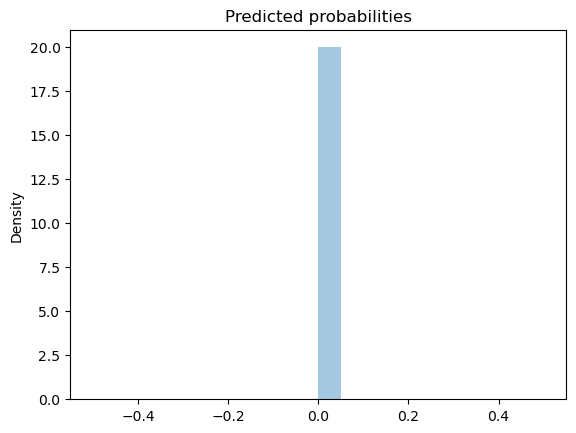

In [8]:
# Parametric density histogram of the predicted probabilities.

sns.distplot(predict_probabilities[:,1], kde=True, rug=False, bins=20)
plt.title('Predicted probabilities')
plt.show()

Observamos como al ser un modelo tan básico ha procedido a imputar a la clase mayoritaria (0) todas las probabilidades, lo cual era esperable.

# <a name="metricas"> 6. Evaluación de las métricas del modelo <a> 

### 6.1. Matriz de confusión

#### 6.1.1. Definición

_La matriz de confusión es de los parámetros más importantes, dado que de el nacen otros parámetros como el de accuracy, precision y recall. En particular, sirve para mostrar de forma explícita cuándo una clase es confundida con otra, lo cual nos, permite trabajar de forma separada con distintos tipos de error._

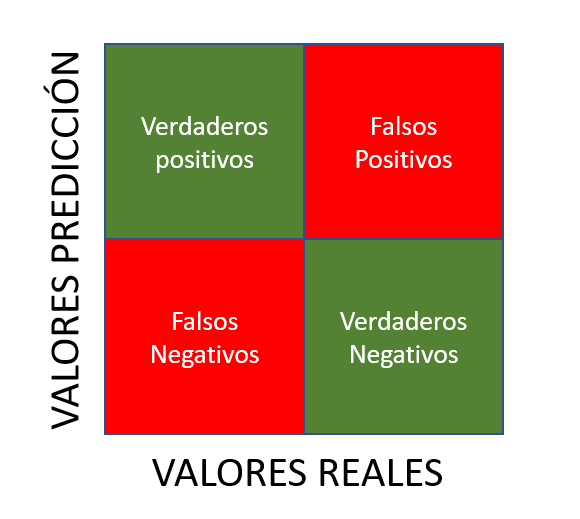

#### 6.1.2. Evaluación del modelo

Procedemos a evaluar el modelo, calculando y representando graficamente su matriz de confusión sin normalizar y normalizada, para poder observar de una forma más sencilla, los aciertos/errores del modelo

Confusion matrix, without normalization
[[3425    0]
 [3047    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


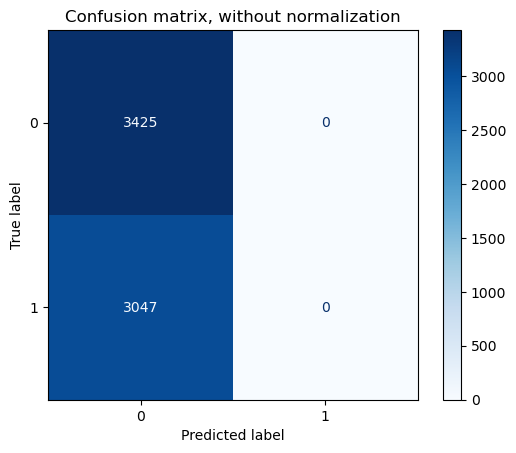

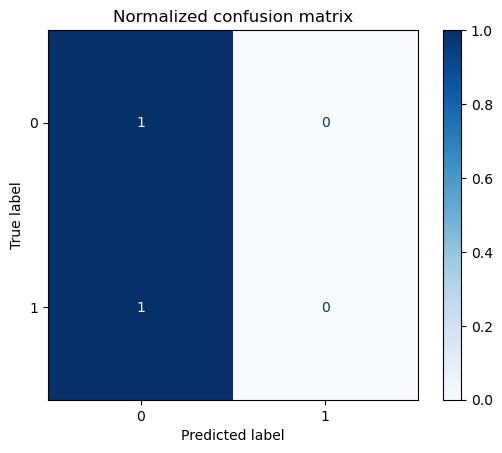

In [9]:
# List with the titles and parameters of the plot.

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

# Loop to plot the confusion matrix normalized and not normalized.
for title, normalize in titles_options:
    
    disp = plot_confusion_matrix(dummy_model, x_val,y_val,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
#Display the confusion matrix.

plt.show()

Como podemos observar para el set de validación, la predicción tiene un **número de 3425 negativos reales y 3047 observaciones con falsos negativos**. Esto se debe a que **nuestro modelo, al estar frente a un problema balanceado va a predecir la clase más frecuente del conjunto de entrenamiento**.

Como podemos ver en la gráfica el modelo tiene practicamente un % medio de acierto, pero principalmente debido a que el dataset está más o menos equilibrado, por lo que únicamente acertará el 50%. **No es eficiente utilizarlo, debido a que al ser un modelo tan simple no resuelve ningún problema. Únicamente nos servirá para compararlo en función del resto de modelos.** 

### 6.2. Métricas: Accuracy, Recall, Precision, F1, F0.5  y F2 score

#### 6.2.1. Definición

 - _La métrica **Accuracy** representa el porcentaje de predicciones correctas frente al total. Por tanto, es el cociente entre los casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, los valores en la diagonal de la matriz de confusión), y la suma de todos los casos._
 
 
 - _La métrica **Recall** de una clase expresa como de  bien puede el modelo detectar a esa clase._
 
 
 - _La métrica **Precision** de una clase define como de confiable es un modelo en responder si un punto pertenece a esa clase_.
 
 - La métrica **F0.5 Score** es una métrica de evaluación que se calcula como la media armonica ponderada del precision y el recall, donde el peso de la precisión es de 0.5. Se utiliza el F0.5 Score cuando se desea dar más importancia al recall en lugar de la precisión.
 
 - _La métrica **F1 Score** de una clase es dada por la media harmonía de precisión y recall (2 * precision * recall / (precision+recall)) digamos que combina precisión y recall en una sola métrica._
 
 
 - _La métrica **F2 Score** de una clase es dada por la media harmonía de precisión y recall. Sin embargo, en ésta metrica el recall tiene un mayor peso que la precisión_.

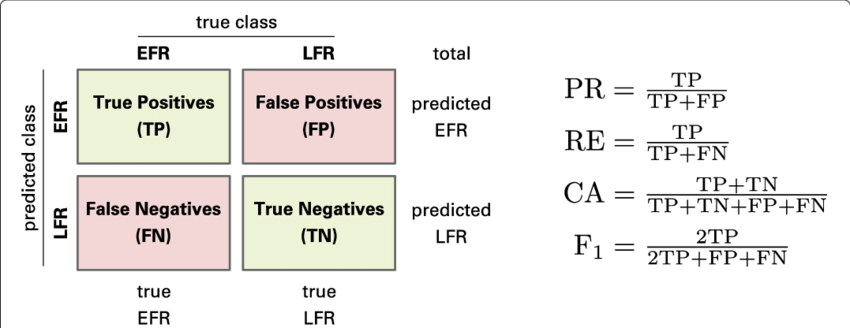

#### 6.2.2. Evaluación del modelo

Para evaluar el modelo imprimiremos las principales métricas con el objetivo de evaluarlas. Sin embargo, en primer lugar estableceremos cuales son las más importantes a estudiar en este caso. 

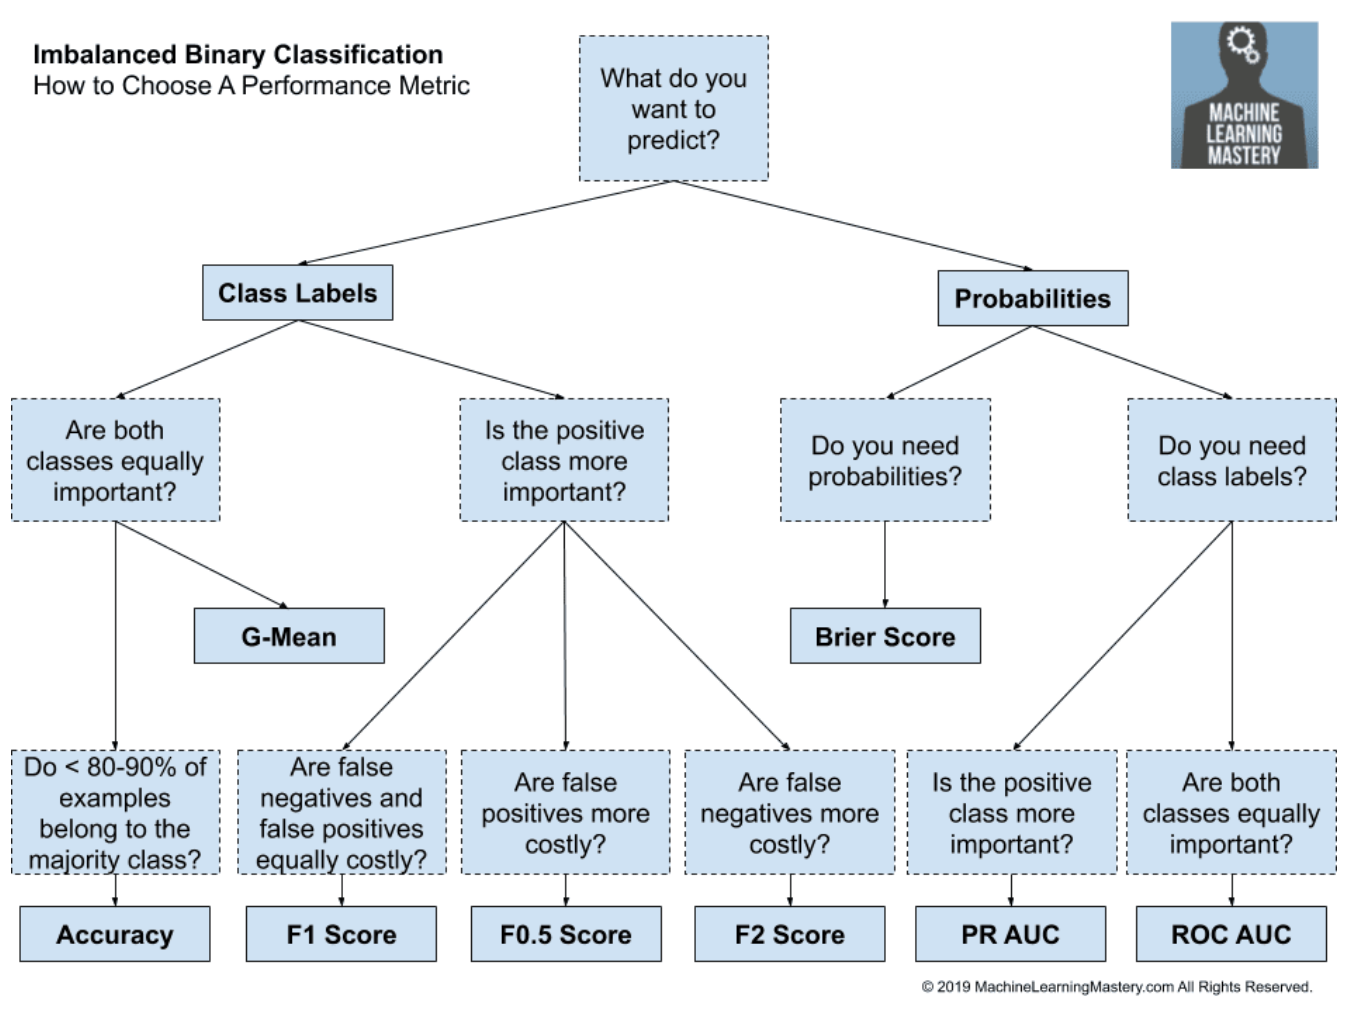

**Dado que nuestro problema quiere predecir si un local va a obtener buena puntuación en función de sus atributos, debemos darnos cuenta que el hecho de que el restaurante tenga buena ùntuación es la clase que más nos interesa, por lo que obtener falsos positivos, puede perjudicar económicamente a la empresa que vaya a utilizar el modelo, por lo que nos fijaremos pprincipalmente en el F0.5 score, con el objetivo de reducir los falsos positivos.**

In [21]:
# Display the metrics values.

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      3425
           1       0.00      0.00      0.00      3047

    accuracy                           0.53      6472
   macro avg       0.26      0.50      0.35      6472
weighted avg       0.28      0.53      0.37      6472



In [10]:
# F 0.5 score.

print('F0.5 score is ' +str(fbeta_score(y_val, predictions, average='binary', beta=0.5)))

# Print the F2 score.

print('F2 score is ' +str(fbeta_score(y_val, predictions, average='binary', beta=2)))

# Model Accuracy

print("Accuracy:",accuracy_score(y_val, predictions))

F0.5 score is 0.0
F2 score is 0.0
Accuracy: 0.529202719406675


- El modelo nos calcula un **accuracy del 53 %**, es decir que únicamente acierta la mitad, no es eficiente. Este valor se debe a que el set está balanceado.


- El modelo nos calcula un **Recall de 0.5**, dado que predice la mitad de los valores como la clase mayoritaria.


- El modelo nos calcula una **Precisión de 0.26**, debido a las mismas razones explicadas anteriormente. 


- El modelo nos calcula un **F0.5 score de 0**, un valor muy malo dado a que se debe a un modelo muy básico que no diferencia correctamente.


- El modelo nos calcula un **F1 score de 0.35**, debido a que al combinar Recall y Precision obtiene un valor medio.


- El modelo nos calcula un **F2 score de 0**, un valor muy malo dado el algoritmo realizado por el modelo. 

**Como mencionamos anteriormente, la métrica F0.5 será la que mayor información nos de acerca de como de bueno es nuestro modelo.**

### 6.3. Curva ROC y Lift

#### 6.3.1. Definición

_La **curva ROC** nos dice qué tan bueno puede distinguir el modelo entre dos cosas, por ejemplo, si un paciente tiene cáncer o no. Mejores modelos pueden distinguir con precisión entre los dos, mientras que un modelo pobre tendrá dificultades para distinguir entre los dos._

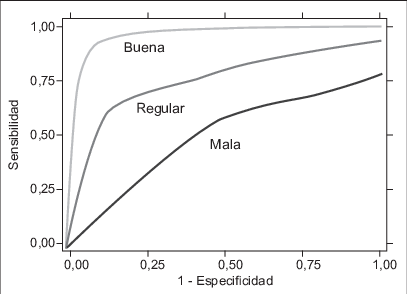

_La **curva Lift** es una gráfica utilizada en la evaluación de modelos de machine learning para clasificación binaria. Se utiliza para evaluar qué tan bien el modelo es capaz de identificar a una clase en particular_

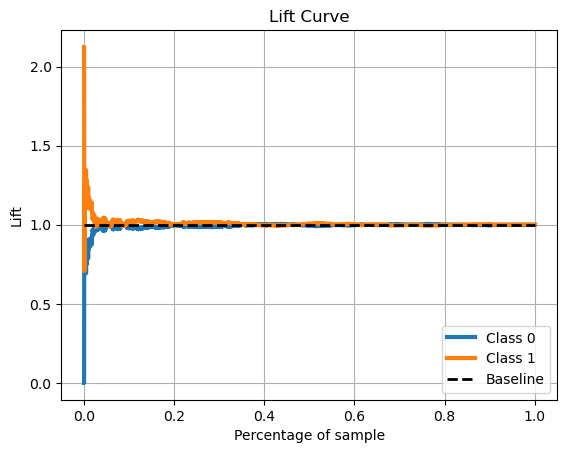

#### 6.3.2. Evaluación del modelo

Para evaluar nuestro modelo, lo representaremos graficamente para deducir que tan bueno es el modelo.

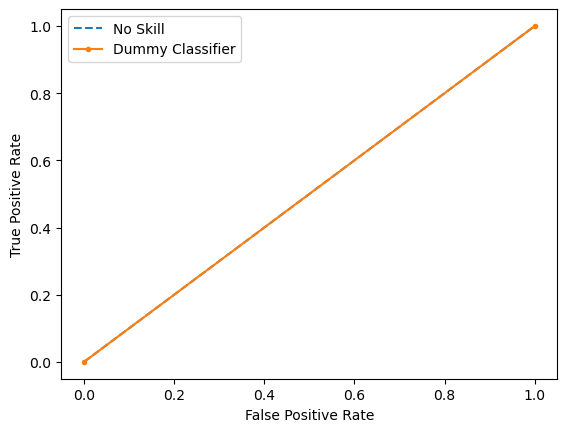

The Compute Area Under the Receiver Operating Characteristic is 0.5


In [10]:
# Keep probabilities for the positive outcome only.

yhat = predict_probabilities[:, 1]

# Calculate roc curves.

fpr, tpr, thresholds = roc_curve(y_val, yhat)

# Plot the roc curve for the model.

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Dummy Classifier')

# Axis labels.

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot.

plt.show()

# Display the ROC AUC.

print('The Compute Area Under the Receiver Operating Characteristic is '+ str(roc_auc_score(y_val,yhat)))

Una vez representada la **curva ROC**, la cual tiene un área bajo la curva con **valor de 0.5**, observamos como nuestro modelo **no tiene capacidad de discriminación** para distinguir si los restaurante obtendrán un valor positivo de estrallas o no. 

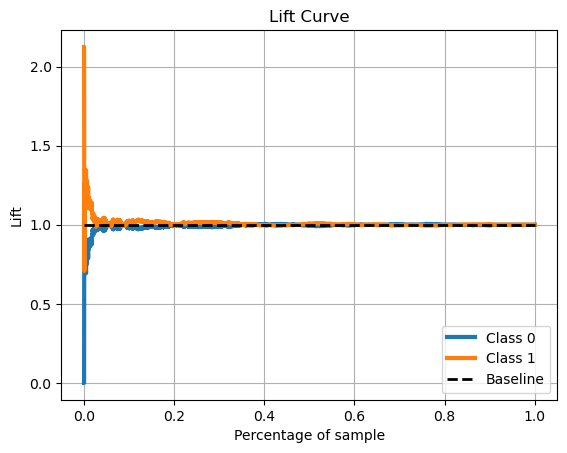

In [18]:
# Plot the lift curve.

skplt.metrics.plot_lift_curve(y_val, predict_probabilities)
plt.show()


Observamos que la curva Lift se mantiene en 1 para todas las proporciones de datos, ya que el modelo dummy siempre tiene una tasa de éxito del 50%. Esto significa que el modelo dummy no está mejorando el rendimiento esperado al azar.

[Ir arriba del documento](#top)